# http://tinyurl.com/vdaycodeday

# Lecture 4: Plotting and Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
#import seaborn as sns

![title](valentines.jpg)

 # But first , git

We've been using git for the last few weeks, but it's a little hard to understand exactly what's going on when we are actually using it. So let's take a minute to talk a bit about what git is actually doing, now that you have some experience with it. If you don't really understand, that's ok! I don't either. This comic is relevant:
<img src="git.png" width="200">
(hovertext: "If that doesn't fix it, I've left a phone number in the readme of a friend of mine who understands git. Just wait through a few minutes of 'it's simple, just think of the branches as...' and eventually you'll learn the commands that fix everything.")

## The most common commands:

 - ```git clone```
 - ```git pull```
 - ```git status```
 - ```git add```
 - ```git commit```
 - ```git push```
 - ```git checkout```
  
But what do these actually mean?

<img src="img/IMG_2747.JPG" width="700">

<img src="img/IMG_2748.JPG" width="700">

You only have to do this step once! It is different than pulling- you are also doing the proccess of creating the git directory on your computer, which has special .git files that make it a git directory. 

<img src="img/IMG_2749.JPG" width="700">

Now you can start making changes to the files in your git directory. At any time, type
   
   ```git status```

to find out which files you've been messing with. git is aware of everything you're doing, but it's only tracking the changes you've added (we'll get to that in a sec)

<img src="img/IMG_2751.JPG" width="700">

Once you have a series of changes to some or all of the files that you think constitute a solid "version" of your code (think, more major than tiny tweaks), you can use ```git add filename``` to add each changed file you want packaged in this version to the staging area. Next, you'd run ```git commit -m 'Description of version'``` to officially create a commit. Commits are stored on your computer and you can checkout different/previous versions at any time. But github.com still doesn't know about anything we've done.

<img src="img/IMG_2752.JPG" width="700">

Once we are ready to update github.com to reflect the changes we've made, we can use ```git push``` to push our most recent commit to github.com, where any new files and changes will now be reflected in the "master" branch. In the diagram, we can see git attempts to merge changes you've made with what was already up on github. 

For the purposes of this class, you are only interested in getting new things down from whatever the most recent version on github.com is. Chris and I are the ones pushing to that repo, and you are just continuously pulling (which is just updating to the most recent version after cloning a repo).

The command we've been using is

```git commit -am 'WIP'```

followed by

```git pull -s recursive -X ours```

What are these doing?

When git attempts to pull new things down, it's going to notice you have tracked changes to files, (the second picture of the sequence). It doesn't want to mess things up by trying to merge the changes you've made and what's coming downstream from online. So the first step is to take all the files in our directory that are tracked, add them, and commit them (create a "version" of all those files' condition at the moment of the commit). (Note, the -am in the commit skips the staging stage and just adds all, then the m allows you to set the message)

Now for the pull: I have a version of hw2 on the server that's not got solutions in it, and you probably have a version on your computer that does. When you pull, git is gonna try to figure out some way of merging those changes- but we actually don't want that. We want to leave any file you've already edited and commited (via the command above) alone. So we pull, but with a strategy (-s) of recursive (one method of attempting to merge), and then flag -X to indicate we are adding an option to that strategy, the option being ours, which means in case of any line conflicts within the files we are downloading, default to our version.


### Plotting

In tutorial 2, we got some experience dealing with two dimensional arrays and extracting and flattening data (the solar spectra), and last week we got some practice with one dimensional data (the neon spectrum) and some basic analysis we can perform. Throughout this proccess, we've been plotting our intermediary outputs and results to get a feel for what they look like. 

So far, we've mostly been giving you the plotting commands that get the job done - that's basically because plotting in python is one of the more semantic and annoying things to get the hang of, not because it's hard but because the options and names for them are numerous and inconsistent. Our goal is to go through some basic examples and how they work, and maybe a couple fancy ones where we will leave them as instructive references to go back to. 

## Basic Plotting

The most basic plot we can concieve is just plotting x against y. 

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49]
[ 0.          1.09861229  1.60943791  1.94591015  2.19722458  2.39789527
  2.56494936  2.7080502   2.83321334  2.94443898  3.04452244  3.13549422
  3.21887582  3.29583687  3.36729583  3.4339872   3.49650756  3.55534806
  3.61091791  3.66356165  3.71357207  3.76120012  3.80666249  3.8501476
  3.8918203 ]


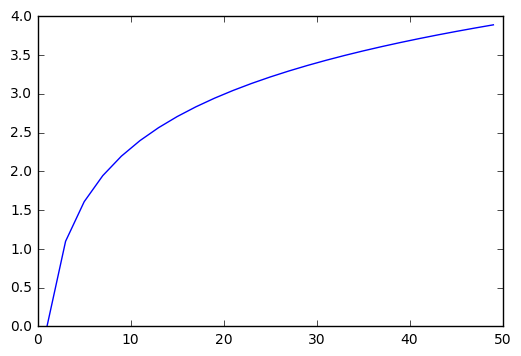

In [2]:
x = np.arange(1,50,2)
y = np.log(x)
print(x)
print(y)
plt.plot(x,y)

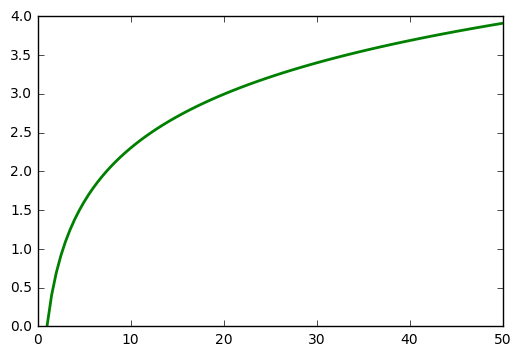

In [3]:
x = np.linspace(1,50,100)
y = np.log(x)
plt.plot(x,y,color='green',lw=2,label='y=log(x)')

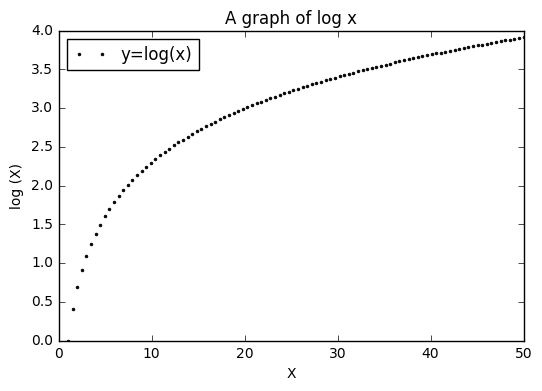

In [4]:
x = np.linspace(1,50,100)
y = np.log(x)
plt.plot(x,y,'ko',lw=2,label='y=log(x)',ms=2)
plt.xlabel('X')
plt.ylabel('log (X)')
plt.legend(loc=2)
plt.title("A graph of log x")
plt.show()

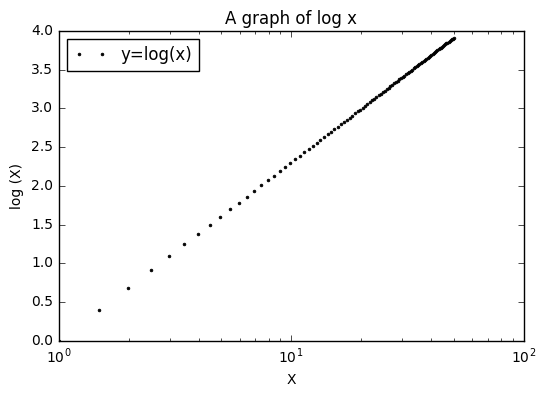

In [5]:
plt.plot(x,y,'ko',lw=2,label='y=log(x)',ms=2)
plt.xlabel('X')
plt.ylabel('log (X)')
plt.legend(loc=2)
plt.title("A graph of log x")
plt.xscale('log')
plt.show()

Let's go from 0 - 100 real quick:

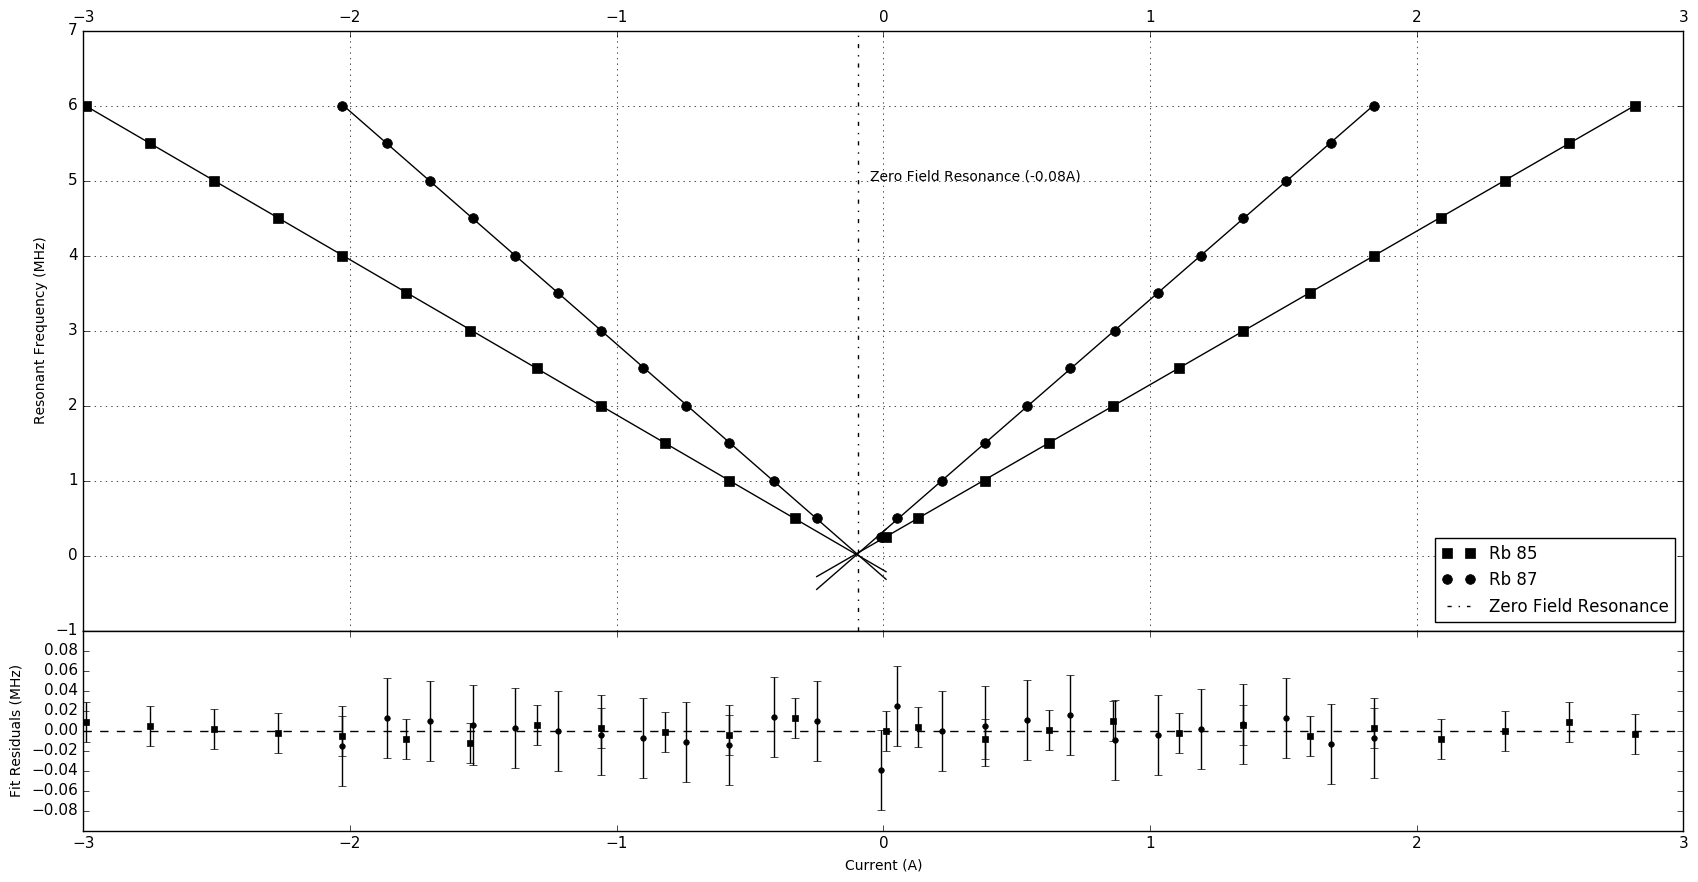

In [ ]:
# A more complicated plot:
def freq_plot():
    # measured at 0.1V/div
    yerr = 0.01 #[MHz]
    frequency_pos = np.array([0.25,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0])
    frequency_neg= np.array([6.0,5.5,5.0,4.5,4.0,3.5,3.0,2.5,2,1.5,1,0.5])
    current_rb85_neg = np.array([-2.99,-2.75,-2.51,-2.27,-2.03,-1.79,-1.55,-1.30,-1.06,-0.82,-0.58,-0.33])
    current_rb85_pos =  np.array([0.01,0.13,0.38,0.62,0.86,1.11,1.35, 1.60, 1.84, 2.09, 2.33, 2.57, 2.82])
    current_rb87_pos = np.array([-0.01,0.05,0.22,0.38,0.54,0.7,0.87,1.03,1.19,1.35,1.51,1.68,1.84])
    current_rb87_neg = np.array([-2.03,-1.86,-1.70,-1.54,-1.38,-1.22,-1.06,-0.9,-0.74,-0.58,-0.41,-0.25])

    plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['figure.figsize'] = (20.,10.)
    fig1 = plt.figure()
    frame1=fig1.add_axes((.1,.3,.8,.6))
    frame1.xaxis.set_ticks_position("top")
    plt.grid()

    fit_rb85_pos = np.polyfit(current_rb85_pos,frequency_pos,1)
    y85pos = fit_rb85_pos[0]*current_rb85_pos + fit_rb85_pos[1]
    plt.plot(current_rb85_pos,y85pos,'k')

    fit_rb87_pos = np.polyfit(current_rb87_pos,frequency_pos,1)
    y87pos = fit_rb87_pos[0]*current_rb87_pos + fit_rb87_pos[1]
    plt.plot(current_rb87_pos,y87pos,'k')

    fit_rb85_neg = np.polyfit(current_rb85_neg,frequency_neg,1)
    y85neg = fit_rb85_neg[0]*current_rb85_neg + fit_rb85_neg[1]
    plt.plot(current_rb85_neg,y85neg,'k')

    fit_r87_neg = np.polynomial.polynomial.polyfit(current_rb87_neg,frequency_neg,1)
    y87neg = fit_r87_neg[1]*current_rb87_neg + fit_r87_neg[0]
    plt.plot(current_rb87_neg,y87neg,'k')


    plt.plot(current_rb85_pos,frequency_pos,'ks',label='Rb 85',ms=7)
    plt.plot(current_rb85_neg,frequency_neg,'ks',ms=7)
    plt.plot(current_rb87_pos,frequency_pos,'ko',label='Rb 87',ms=7)
    plt.plot(current_rb87_neg,frequency_neg,'ko',ms=7)
    plt.ylabel('Resonant Frequency (MHz)')


    #Extend the fit lines
    extend_87neg = np.linspace(np.max(current_rb87_neg),np.min(current_rb85_pos),20)
    extend_87pos = np.linspace(np.max(current_rb87_neg),np.min(current_rb85_pos),20)
    extend_85neg = np.linspace(np.max(current_rb85_neg),np.min(current_rb85_pos),20)
    extend_85pos = np.linspace(np.max(current_rb87_neg),np.min(current_rb85_pos),20)
    y85pos_extended = fit_rb85_pos[0]*extend_85pos + fit_rb85_pos[1]
    y87pos_extended = fit_rb87_pos[0]*extend_87pos + fit_rb87_pos[1]
    y85neg_extended = fit_rb85_neg[0]*extend_85neg + fit_rb85_neg[1]
    y87neg_extended = fit_r87_neg[1]*extend_87neg + fit_r87_neg[0]
    plt.plot(extend_87neg,y87neg_extended,'k')
    plt.plot(extend_85neg,y85neg_extended,'k')
    plt.plot(extend_87pos,y87pos_extended,'k')
    plt.plot(extend_85pos,y85pos_extended,'k')
    plt.axvline(-0.095,ls='-.',color='k',label='Zero Field Resonance')
    plt.annotate('Zero Field Resonance (-0.08A)',[-0.05,5.0])
    plt.legend(loc=4)
    frame2=fig1.add_axes((.1,.1,.8,.2))  
    plt.xlabel('Current (A)')
    residual1 = frequency_pos - y87pos
    residual2 = frequency_pos - y85pos 
    residual3 = frequency_neg - y87neg
    residual4 = frequency_neg - y85neg
    plt.errorbar(current_rb85_pos,residual2,yerr=0.02,fmt='s',color='k',label='Rb85 (+ polarity)',ms=4)
    plt.errorbar(current_rb85_neg,residual4,yerr=0.02,fmt='s',color='k',label='Rb85 (- polarity)',ms=4)
    plt.errorbar(current_rb87_pos,residual1,yerr=0.04,fmt='o',color='k',label='Rb87 (+ polarity)',ms=4)
    plt.errorbar(current_rb87_neg,residual3,yerr=0.04,fmt='o',color='k',label='Rb87 (- polarity)',ms=4)
    plt.axhline(0,ls='--',color='k')
    #plt.ylim((0,6.5))
    #plt.tight_layout()
    #plt.legend()
    frame2.axes.set_yticks(frame2.axes.get_yticks()[:-1])
    plt.ylim((-0.1,0.1))
    plt.ylabel('Fit Residuals (MHz)')
    plt.show()
freq_plot()

<img src='img/darkness.jpg' width="500">

# 2D Plotting 

What if we want to plot a two dimensional image? We saw how this works briefly with our solar spectrum



In [20]:
from skimage.io import imread
im = imread("img/hearty.jpeg")

In [25]:
#lets say i have a two dimensional image (in this case rgb) called im
print(im)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


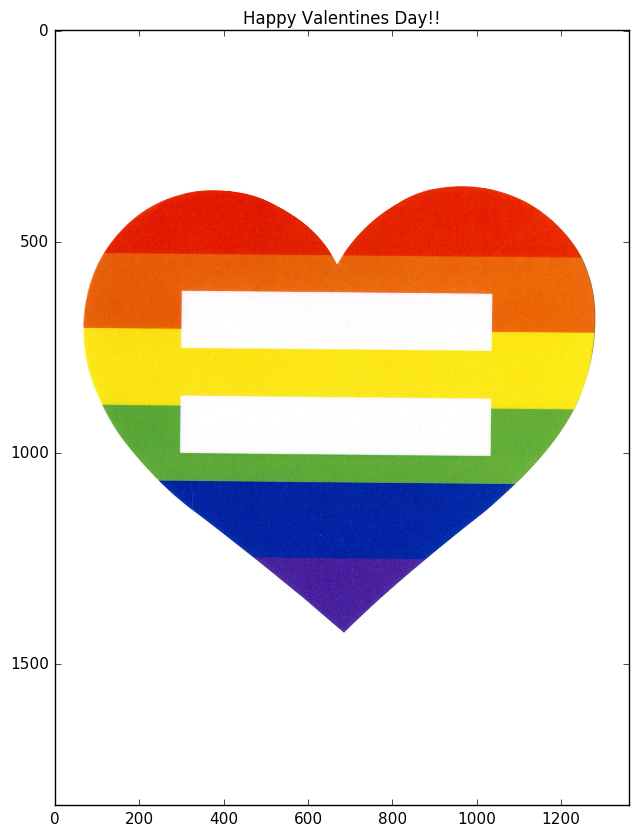

In [26]:
plt.imshow(im)
plt.title('Happy Valentines Day!!')
plt.show()

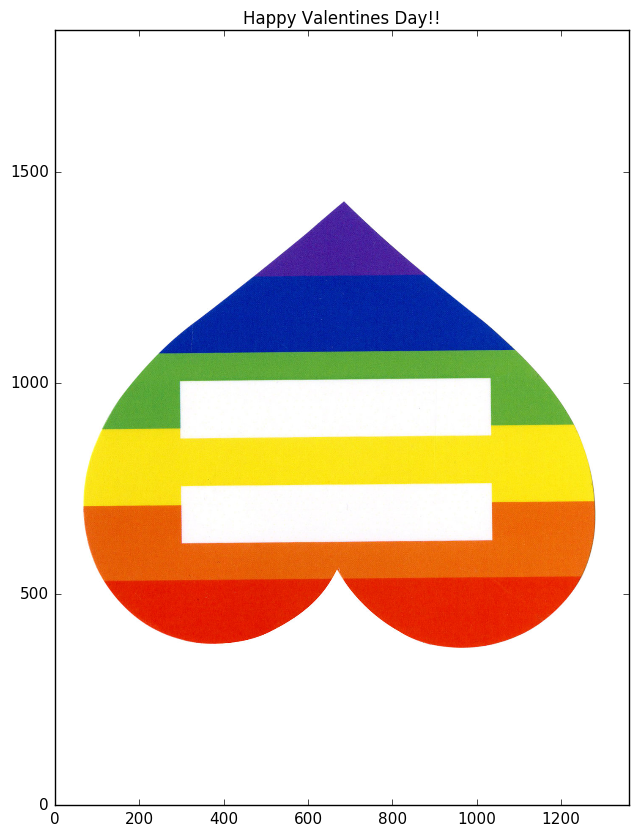

In [27]:
plt.imshow(im,origin='lower')
plt.title('Happy Valentines Day!!')
plt.show()

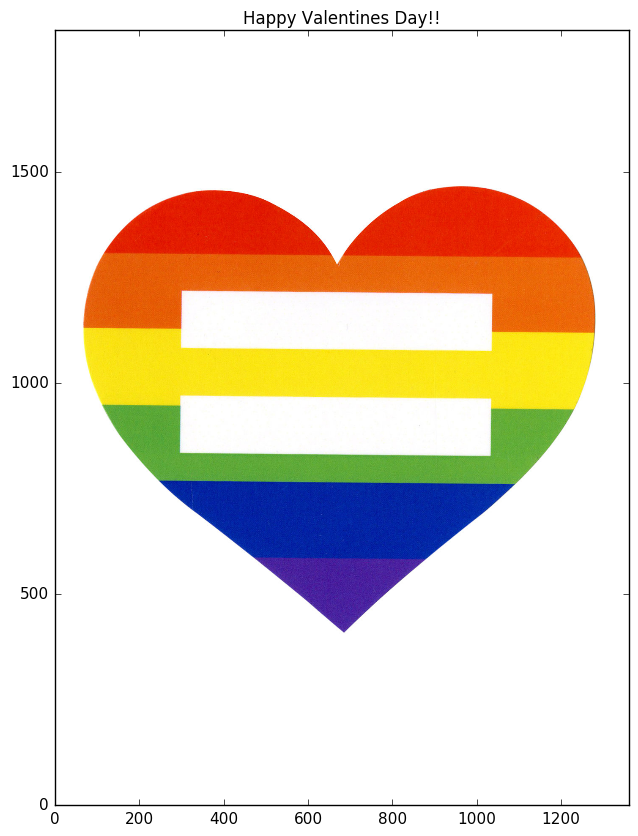

In [28]:
plt.imshow(im[::-1],origin='lower')
plt.title('Happy Valentines Day!!')
plt.show()

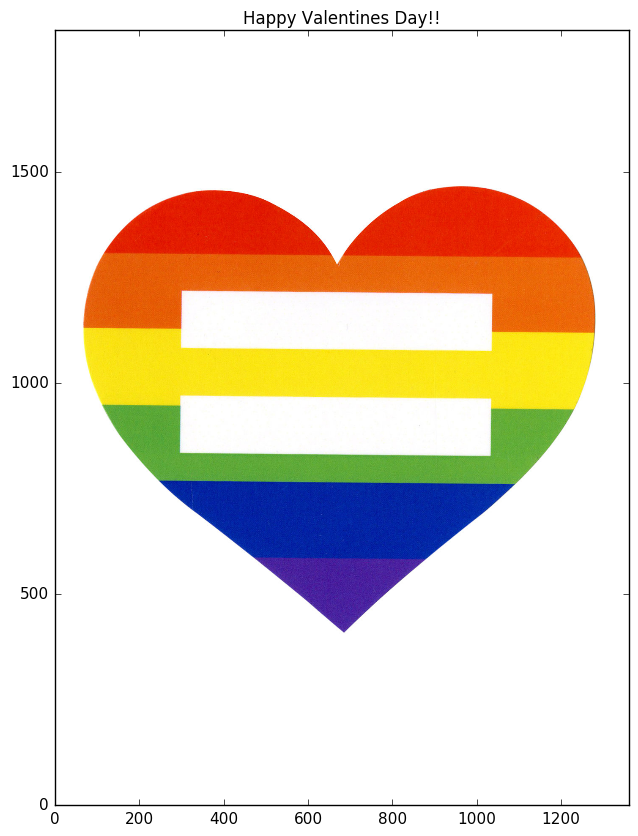

In [29]:
plt.imshow(im[::-1],origin='lower',cmap='gray_r')
plt.title('Happy Valentines Day!!')
plt.show()

In [32]:
import pyfits as pf
solar = pf.open('solar_spec.fits')[0]

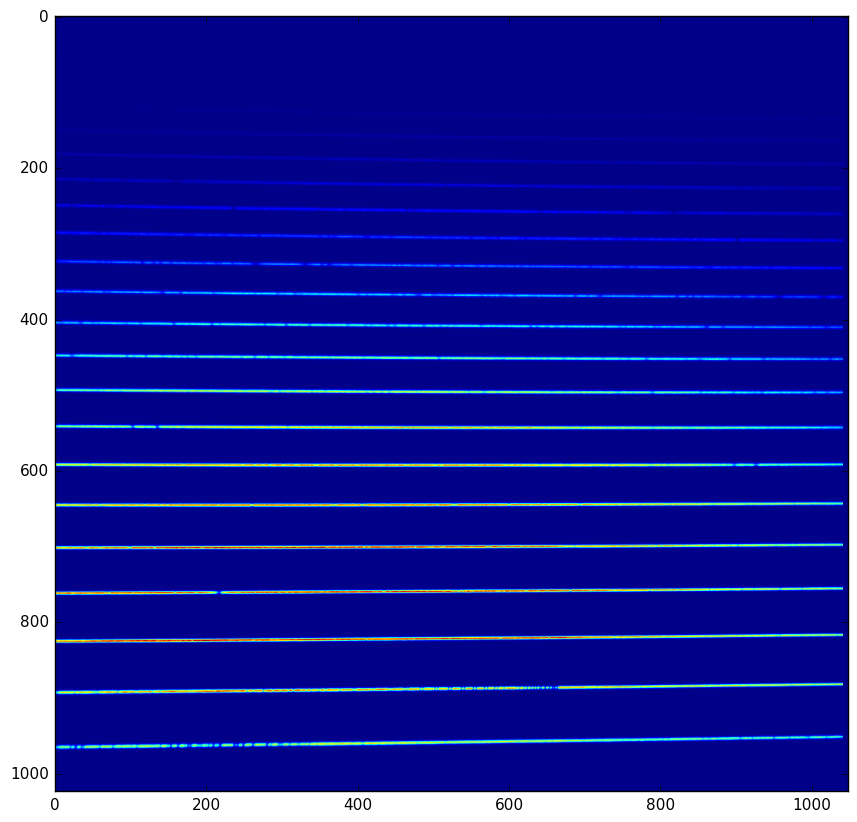

In [33]:
image = solar.data
plt.imshow(image)

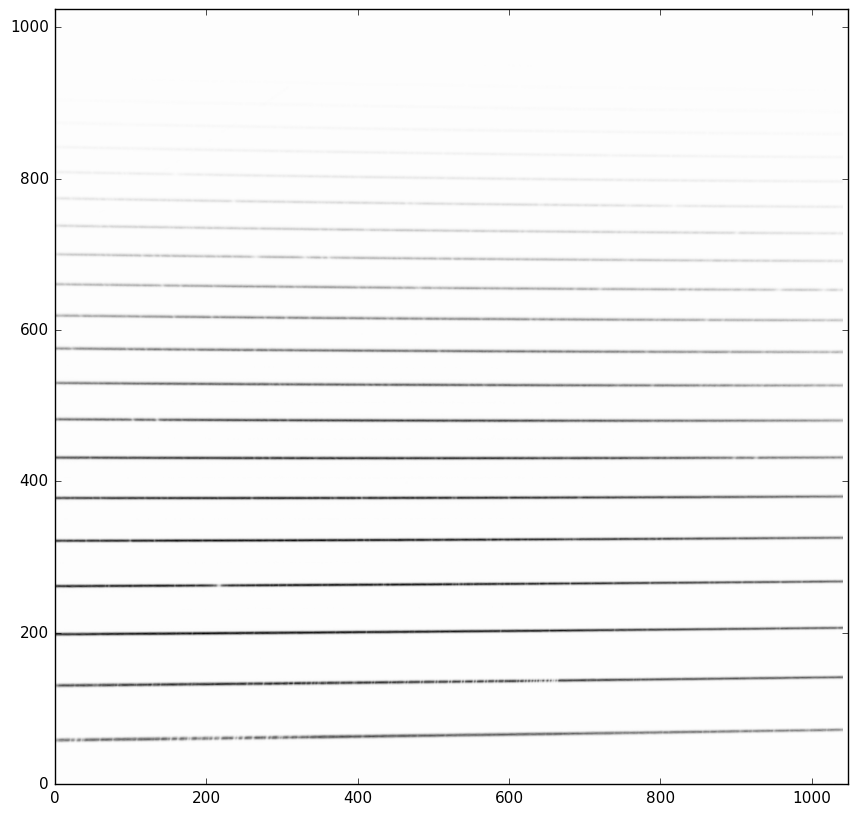

In [34]:
plt.imshow(image[::-1],origin='lower',cmap='gray_r')

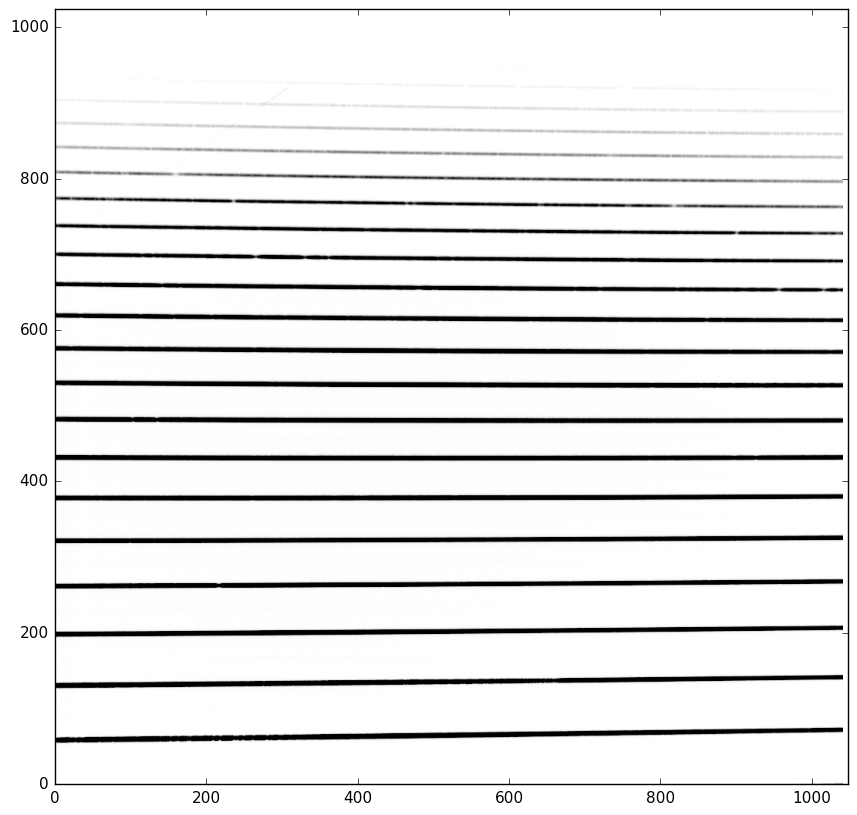

In [38]:
plt.imshow(image[::-1],origin='lower',cmap='gray_r',vmin=np.median(image),vmax=np.median(image)*5)

In [39]:
hst_image = pf.open('502nmos.fits')[0].data

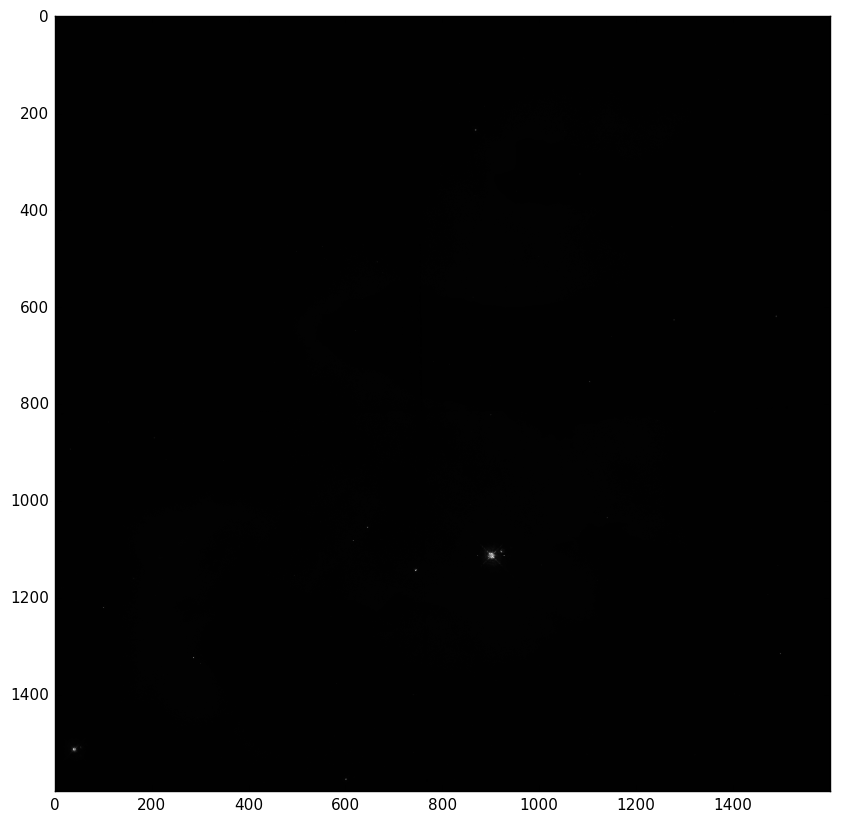

In [42]:
plt.imshow(hst_image[::-1],cmap='gray')

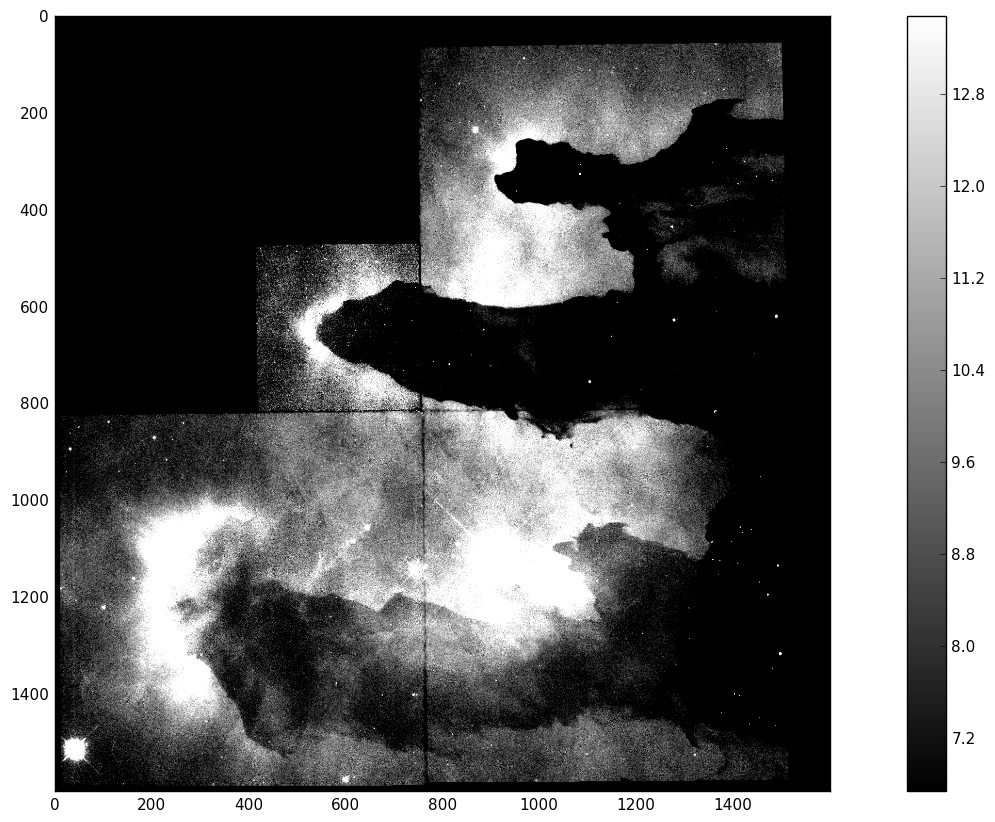

In [51]:
plt.imshow(hst_image[::-1],cmap='gray',vmin=np.median(hst_image),vmax=np.median(hst_image)*2)
plt.colorbar()

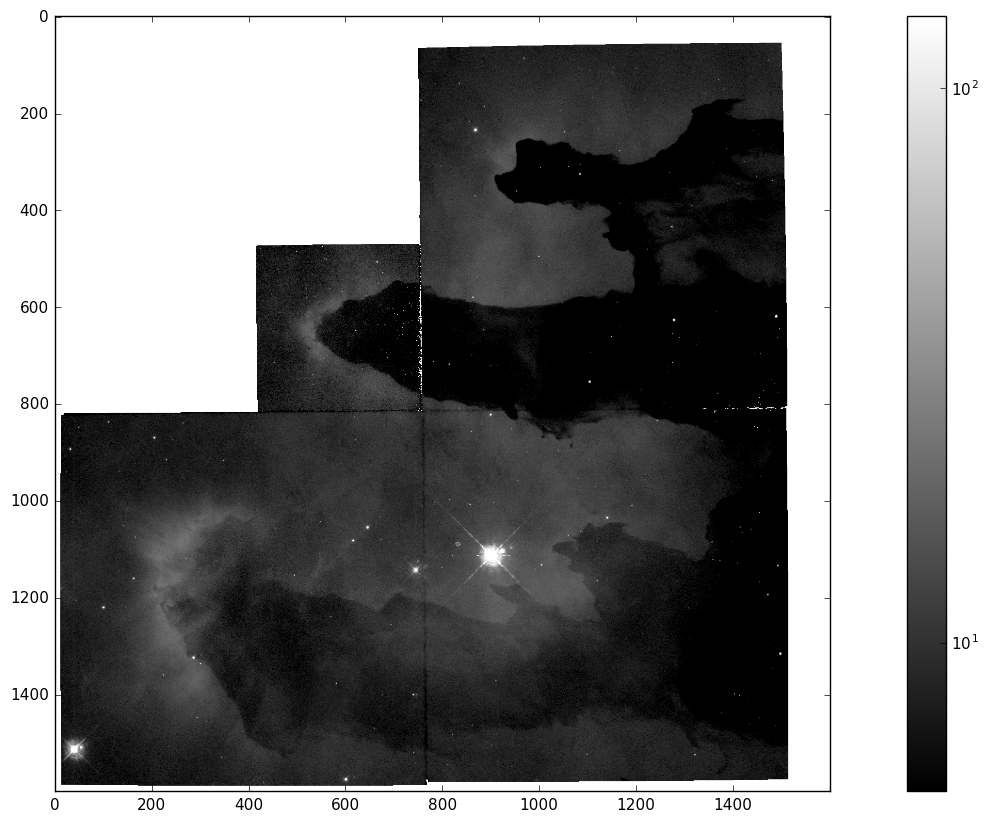

In [63]:
from matplotlib.colors import LogNorm
plt.imshow(hst_image[::-1],cmap='gray',norm=LogNorm(np.median(hst_image)*.8,np.median(hst_image)*20))
plt.colorbar()
plt.show()